In [1]:
# scikit-image 패키지 설치
! pip3 install scikit-image 

Defaulting to user installation because normal site-packages is not writeable


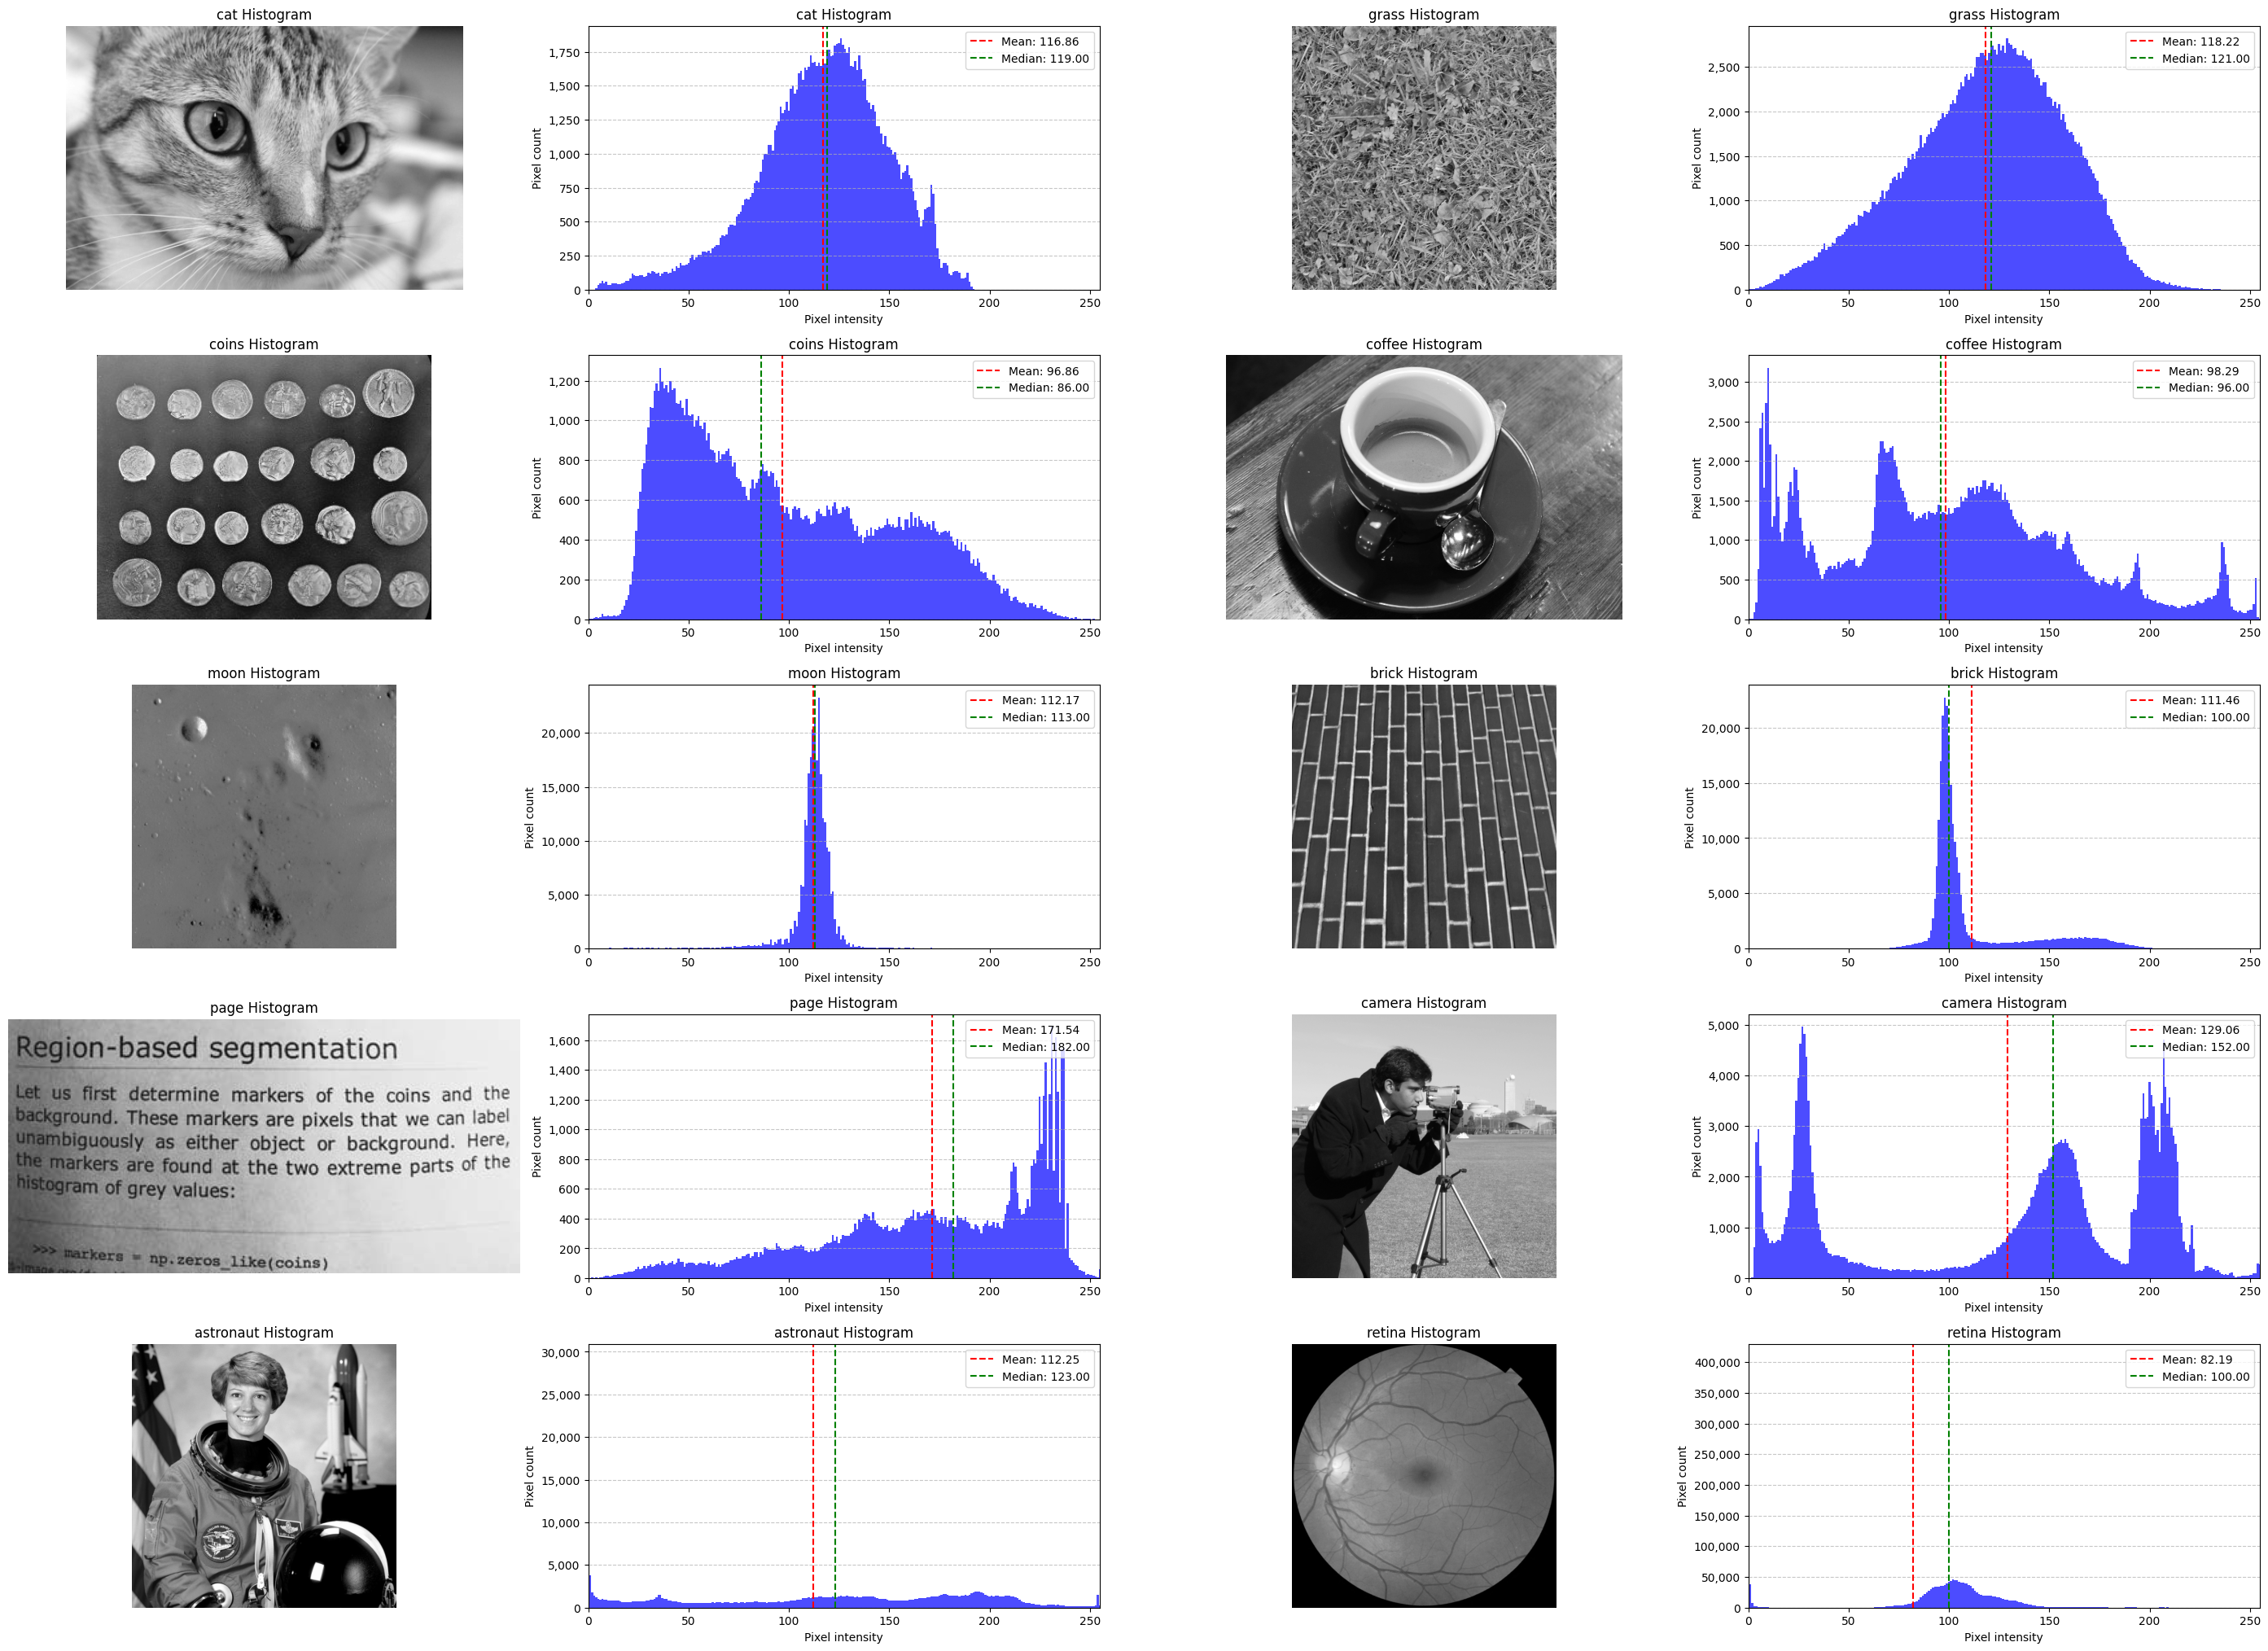

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt
from skimage import data, color

# skimage.data에서 사용 가능한 샘플 이미지 목록
sample_images = {
    "cat": data.cat(),
    "grass": data.grass(),
    "coins": data.coins(),
    "coffee": data.coffee(),
    "moon": data.moon(),
    "brick" : data.brick(),
    "page": data.page(),
    "camera": data.camera(),
    "astronaut": data.astronaut(),
    "retina": data.retina(),
}

# 그래프 설정
cols = 4  # 원본 + 히스토그램
rows = len(sample_images)//cols*2 + 2

plt.figure(figsize=(cols * 7, rows * 4))

# 각 이미지 처리 및 출력
for idx, (name, img) in enumerate(sample_images.items()):
    # 이미지가 이미 회색조인지 확인, 아니면 변환
    if len(img.shape) == 3:
        gray_img = color.rgb2gray(img)
        gray_img = (gray_img * 255).astype(np.uint8)  # 0-255로 변환
    else:
        gray_img = img

    # 평균(mean)과 중앙값(median) 계산
    mean_val = np.mean(gray_img)
    median_val = np.median(gray_img)

    # 히스토그램 계산
    histogram = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

    # 원본(회색조) 이미지 출력
    plt.subplot(rows, cols, idx * 2 + 1)
    plt.title(f"{name} Histogram")
    plt.imshow(gray_img, cmap="gray")
    plt.axis("off")

    # 히스토그램 출력
    plt.subplot(rows, cols, idx * 2 + 2)
    plt.title(f"{name} Histogram")

    plt.bar(range(256), histogram.ravel(), width=1, color="blue", alpha=0.7)
    # 평균과 중앙값 표시
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color="green", linestyle="--", linewidth=1.5, label=f"Median: {median_val:.2f}")
    
    plt.xlabel("Pixel intensity")
    plt.ylabel("Pixel count")
    plt.xlim([0, 255])
    
    # y축 tick 포매팅
    from matplotlib.ticker import FuncFormatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _ : f'{int(value):,}'))

    # 레전드와 그리드 추가
    plt.legend(loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
pass

# 그래프 출력
plt.tight_layout()
plt.show()